### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Exploratory Data Analysis (EDA)
   * Statistical summary of data.
   * Analysing missing value rates.
   * Handling missing values.
   * Visualizing features.
   * Encode categorical features like sex, embarked, etc.
   * Applying log-transformation to normalize the features and git rid of the skew.
   * Using Min-Max to scale the features.

In [2]:
# Loading dataset
df = pd.read_csv("titanic.csv")
print("Number of rows:", df.shape[0])
df.head().style.background_gradient(cmap="turbo")

Number of rows: 1309


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.337500,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.550000,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.550000,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.550000,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.550000,C22 C26,S,0


In [3]:
# Statistical summary
df.describe().T.style.background_gradient(cmap="turbo")

,count,mean,std,min,25%,50%,75%,max
pclass,1309.000000,2.294882,0.837836,1.000000,2.000000,3.000000,3.000000,3.000000
age,1046.000000,29.881135,14.413500,0.166700,21.000000,28.000000,39.000000,80.000000
sibsp,1309.000000,0.498854,1.041658,0.000000,0.000000,0.000000,1.000000,8.000000
parch,1309.000000,0.385027,0.865560,0.000000,0.000000,0.000000,0.000000,9.000000
fare,1308.000000,33.295479,51.758668,0.000000,7.895800,14.454200,31.275000,512.329200
survived,1309.000000,0.381971,0.486055,0.000000,0.000000,0.000000,1.000000,1.000000


In [4]:
# Analysing missing value rates
for col in df.columns:
    print(f"{col} missing value rate: {round(df[col].isnull().sum() * 100 / len(df),2)}%")

# Correlation between "age" and the target label "survived"
print(f"\nCorrelation between passenger age and their survival status: {round(df['age'].corr(df['survived']), 3)}")

pclass missing value rate: 0.0%
name missing value rate: 0.0%
sex missing value rate: 0.0%
age missing value rate: 20.09%
sibsp missing value rate: 0.0%
parch missing value rate: 0.0%
ticket missing value rate: 0.0%
fare missing value rate: 0.08%
cabin missing value rate: 77.46%
embarked missing value rate: 0.15%
survived missing value rate: 0.0%

Correlation between passenger age and their survival status: -0.056


### Findings based on analysis
   * Four columns have missing data: age, fare, cabin, embarked
      * We can handel the "fare" and "embarked columns by dropping the rows with missing value since they represent less than 1% of our data.
      * For the "cabin" column, more than 75% of the values are missing. So, there is really nothing we can do for that column but drop it.
      * As for the "age" column, its correlation to the target variable is very low at - 0.056, implying that it's safe to drop that column.

In [5]:
# Handling missing values
# Drop columns with high missing-value rates
df.drop(columns=["cabin", "age"], inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

print("Number of rows:", df.shape[0])

Number of rows: 1306


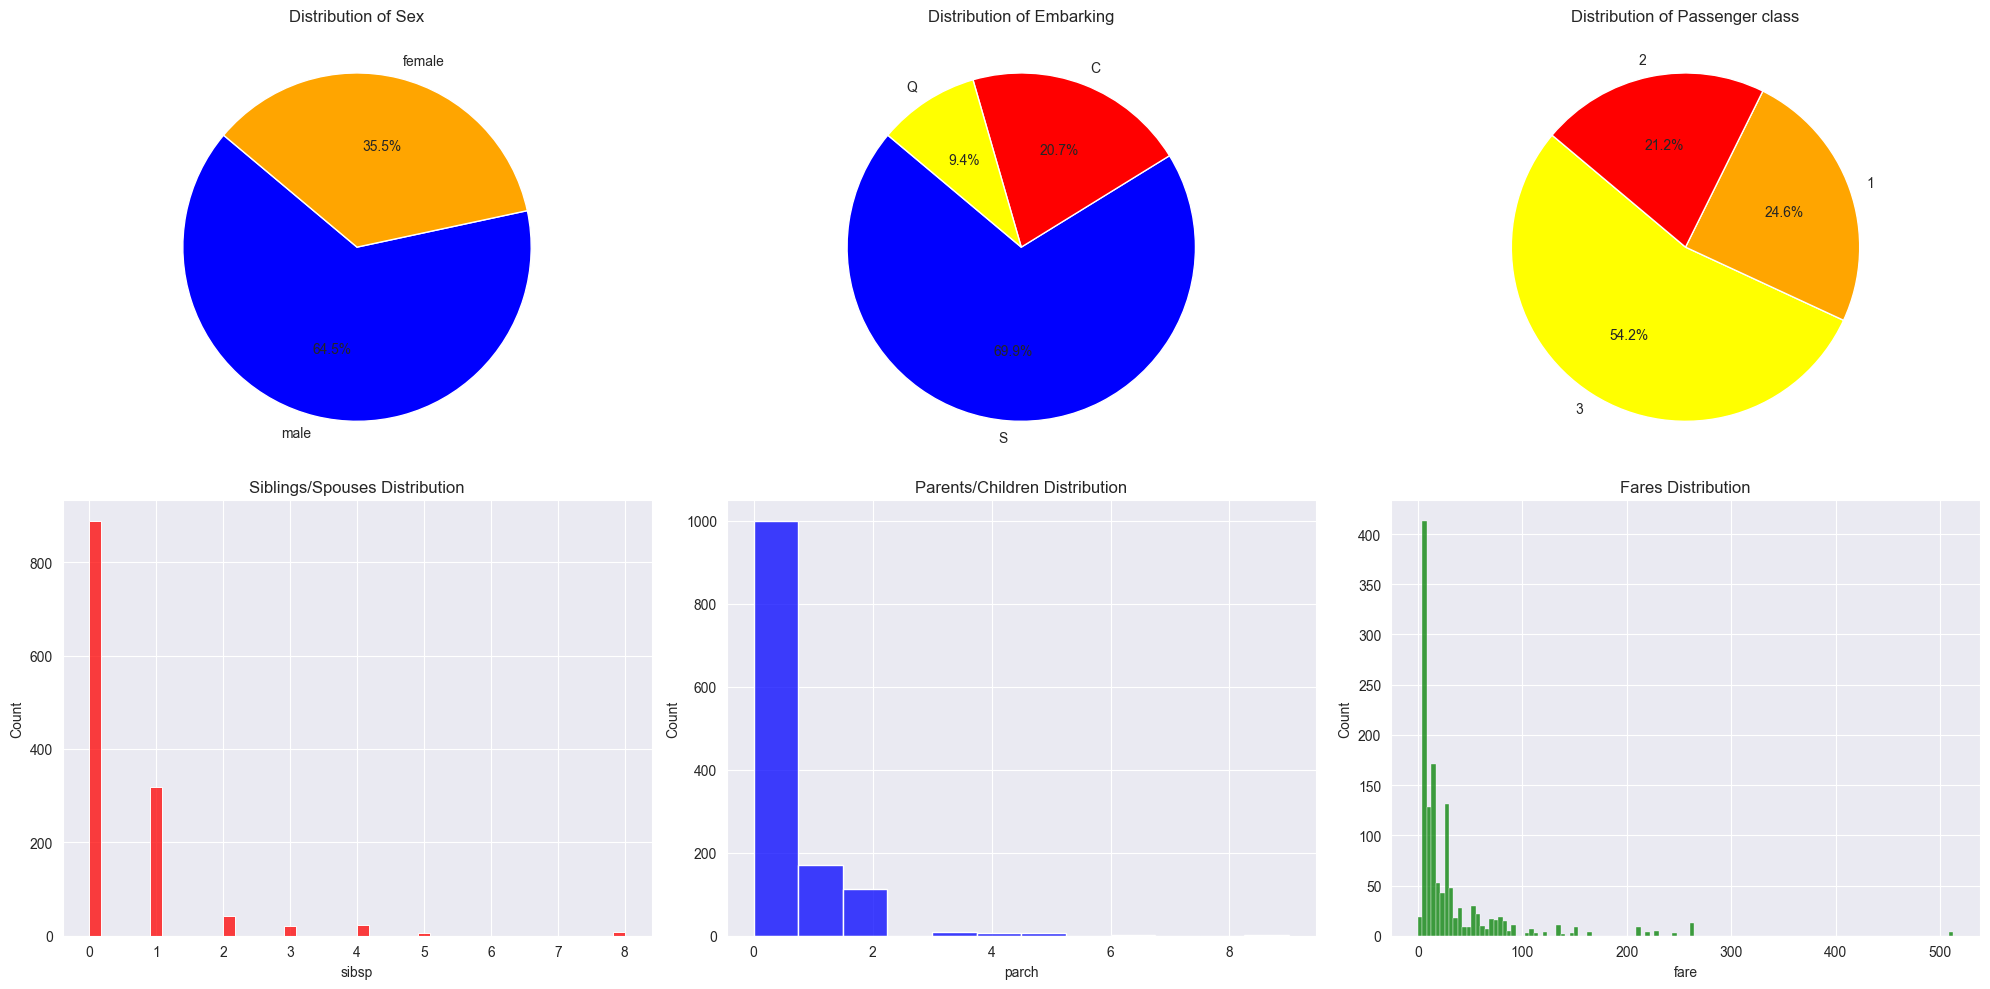

In [6]:
# Visualizing features
axes = plt.subplots(2, 3, figsize=(20, 10))[1]

# Sex Distribution
sex_counts = df['sex'].value_counts(normalize=True)
axes[0, 0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
axes[0, 0].set_title('Distribution of Sex')

# Embarked Distribution
embarked_counts = df['embarked'].value_counts(normalize=True)
axes[0, 1].pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'yellow'])
axes[0, 1].set_title('Distribution of Embarking')

# Passenger class Distribution
pclass_counts = df['pclass'].value_counts(normalize=True)
axes[0, 2].pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=140, colors=['yellow', 'orange', 'red'])
axes[0, 2].set_title('Distribution of Passenger class')

# Siblings/Spouses Distribution
sns.histplot(df['sibsp'], ax=axes[1, 0], color='red')
axes[1, 0].set_title('Siblings/Spouses Distribution')

# Parents/Children Distribution
sns.histplot(df['parch'], ax=axes[1, 1], color='blue')
axes[1, 1].set_title('Parents/Children Distribution')

# Fares Distribution
sns.histplot(df['fare'], ax=axes[1, 2], color='green')
axes[1, 2].set_title('Fares Distribution')

plt.tight_layout()
plt.show()

In [7]:
# Encoding categorical features
df = pd.concat([df, pd.get_dummies(df['sex'], prefix='sex')], axis=1)
df.drop('sex', axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df['embarked'], prefix='embarked')], axis=1)
df.drop('embarked', axis=1, inplace=True)

df.head().style.background_gradient(cmap="turbo")

,pclass,name,sibsp,parch,ticket,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,"Allen, Miss. Elisabeth Walton",0,0,24160,211.337500,1,True,False,False,False,True
1,1,"Allison, Master. Hudson Trevor",1,2,113781,151.550000,1,False,True,False,False,True
2,1,"Allison, Miss. Helen Loraine",1,2,113781,151.550000,0,True,False,False,False,True
3,1,"Allison, Mr. Hudson Joshua Creighton",1,2,113781,151.550000,0,False,True,False,False,True
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,2,113781,151.550000,0,True,False,False,False,True


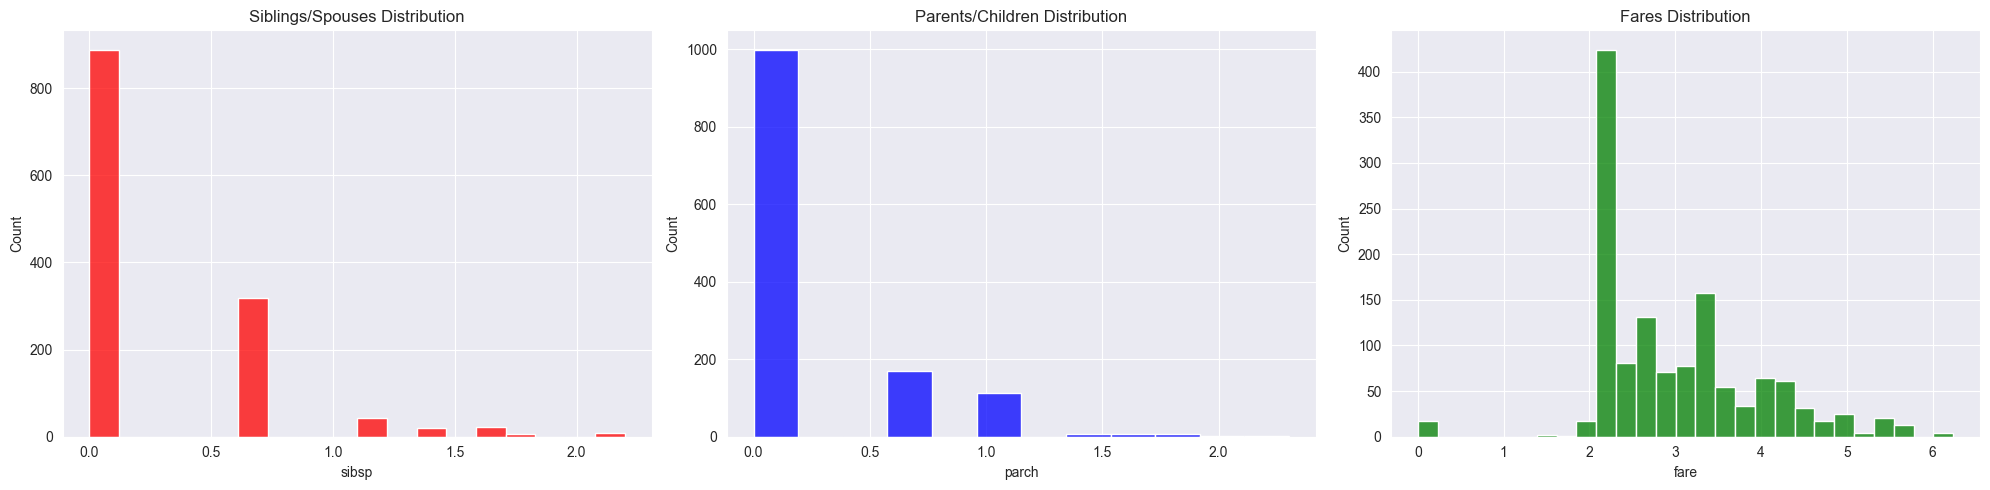

In [8]:
# Apply log transformation to 'fare', 'parch', and 'sibsp' columns
df['fare'] = np.log(df['fare'] + 1)  # Adding 1 to handle zero values
df['parch'] = np.log(df['parch'] + 1)  # Adding 1 to handle zero values
df['sibsp'] = np.log(df['sibsp'] + 1)  # Adding 1 to handle zero values

axes = plt.subplots(1, 3, figsize=(20, 5))[1]

# Siblings/Spouses Distribution
sns.histplot(df['sibsp'], ax=axes[0], color='red')
axes[0].set_title('Siblings/Spouses Distribution')

# Parents/Children Distribution
sns.histplot(df['parch'], ax=axes[1], color='blue')
axes[1].set_title('Parents/Children Distribution')

# Fares Distribution
sns.histplot(df['fare'], ax=axes[2], color='green')
axes[2].set_title('Fares Distribution')

plt.tight_layout()
plt.show()

In [9]:
# Scaling features
scaler = MinMaxScaler()
df[['fare', 'parch', 'sibsp', 'pclass']] = scaler.fit_transform(df[['fare', 'parch', 'sibsp', 'pclass']])